In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

In [36]:
!pip install openpyxl



In [37]:
# =========================
# 1. CSV File Workflow
# =========================
print("\n================ CSV DATA WORKFLOW ================\n")


================ CSV DATA WORKFLOW ================



In [38]:
# Load Data
csv_data = pd.read_csv("C:/Users/SAKSHI/Downloads/CL 1/Auto Sales data.csv") # update path in Colab
print("CSV Data Loaded:\n", csv_data.head())

CSV Data Loaded:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24-02-2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07-05-2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01-07-2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25-08-2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28-10-2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  

In [39]:
# Explore
print("\n--- CSV Info ---")
print(csv_data.info())
print("\n--- CSV Description ---")
print(csv_data.describe(include='all'))


--- CSV Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POS

In [40]:
# Check Missing Values
print("\nMissing values:\n", csv_data.isnull().sum())


Missing values:
 ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [41]:
# Clean
csv_data = csv_data.drop_duplicates()
csv_data = csv_data.fillna(method="ffill").fillna(method="bfill")
csv_data = csv_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
print("\nCleaned CSV Data Sample:\n", csv_data.head())


Cleaned CSV Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24-02-2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07-05-2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01-07-2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25-08-2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28-10-2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRE

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_14980\2043385623.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  csv_data = csv_data.fillna(method="ffill").fillna(method="bfill")
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_14980\2043385623.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  csv_data = csv_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [42]:
# Transform
if 'Date' in csv_data.columns:
    csv_data['Date'] = pd.to_datetime(csv_data['Date'], errors='coerce')
    csv_data['Year'] = csv_data['Date'].dt.year
    csv_data['Month'] = csv_data['Date'].dt.month
if 'Price' in csv_data.columns and 'Quantity' in csv_data.columns:
    csv_data['Total_Revenue'] = csv_data['Price'] * csv_data['Quantity']

In [43]:
# Analyze
print("\nCSV Descriptive Stats:\n", csv_data.describe())
if 'Product' in csv_data.columns and 'Total_Revenue' in csv_data.columns:
    sales_by_product = csv_data.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
    print("\nTotal Sales by Product:\n", sales_by_product)
if 'Year' in csv_data.columns:
    yearly_sales = csv_data.groupby('Year')['Total_Revenue'].sum()
    print("\nYearly Sales:\n", yearly_sales)


CSV Descriptive Stats:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
std       91.877521         9.762135    42.042549         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000           2747.000000  2747.000000  
mean    3553.047583           1757.085912   100.691664  
std     1838.953901            819.280576    40.114802  
min      482.130000             42.000000    33.000000  
25%     2204.350000           1077.000000    68.000000  
50

<Figure size 1000x600 with 0 Axes>

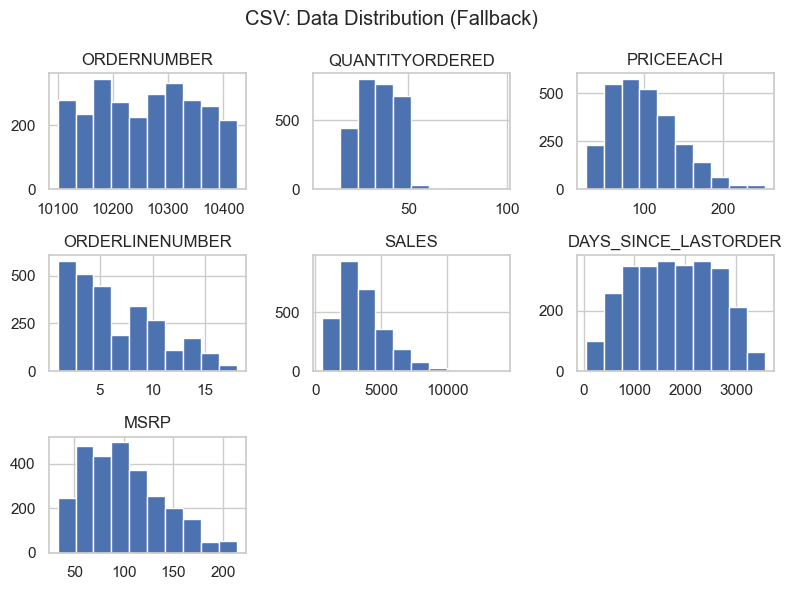

In [71]:
# Visualize
plt.figure(figsize=(10,6))
if 'Product' in csv_data.columns and 'Total_Revenue' in csv_data.columns:
    sns.barplot(x='Product', y='Total_Revenue', data=csv_data, estimator=sum, ci=None, palette="viridis")
    plt.title("CSV: Total Sales by Product", fontsize=14)
    plt.xlabel("Product")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.6)
else:
    csv_data.hist(figsize=(8,6))
    plt.suptitle("CSV: Data Distribution (Fallback)")
plt.tight_layout()
plt.show()


In [45]:
# =======================================================
# 2. Excel File Workflow
# =======================================================
print("\n================ EXCEL DATA WORKFLOW ================\n")



================ EXCEL DATA WORKFLOW ================



In [46]:
# Load Data
excel_data = pd.read_excel("C:/Users/SAKSHI/Downloads/CL 1/Auto Sales data.xlsx")
print("Excel Data Loaded:\n", excel_data.head())

Excel Data Loaded:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0 

In [47]:
# Explore
print("\n--- Excel Info ---")
print(excel_data.info())
print("\n--- Excel Description ---")
print(excel_data.describe(include='all'))


--- Excel Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13

In [48]:
# Check Missing Values
print("\nMissing values:\n", excel_data.isnull().sum())


Missing values:
 ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [49]:
# Clean
excel_data = excel_data.drop_duplicates()
excel_data = excel_data.fillna(0) # replace with 0
print("\nCleaned Excel Data Sample:\n", excel_data.head())


Cleaned Excel Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLI

In [51]:
# Transform
if 'Date' in excel_data.columns:
    excel_data['Date'] = pd.to_datetime(excel_data['Date'], errors='coerce')
    excel_data['Year'] = excel_data['Date'].dt.year
    excel_data['Month'] = excel_data['Date'].dt.month
if 'Price' in excel_data.columns and 'Quantity' in excel_data.columns:
    excel_data['Total_Revenue'] = excel_data['Price'] * excel_data['Quantity']

In [54]:
#analyze
print("\nExcel Descriptive Stats:\n", excel_data.describe())

if 'Product' in excel_data.columns and 'Total_Revenue' in excel_data.columns:
    sales_by_product = excel_data.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
    print("\nTotal Sales by Product:\n", sales_by_product)

if 'Month' in excel_data.columns:
    monthly_sales = excel_data.groupby('Month')['Total_Revenue'].sum()
    print("\nMonthly Sales:\n", monthly_sales)



Excel Descriptive Stats:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   
std       91.877521         9.762135    42.042549         4.230544   

              SALES                      ORDERDATE  DAYS_SINCE_LASTORDER  \
count   2747.000000                           2747           2747.000000   
mean    3553.047583  2019-05-13 21:56:17.211503360           1757.085912   
min      482.130000            2018-01-06 00:00:00             42.000000   
25%     2204.350000            2018-11

<Figure size 800x600 with 0 Axes>

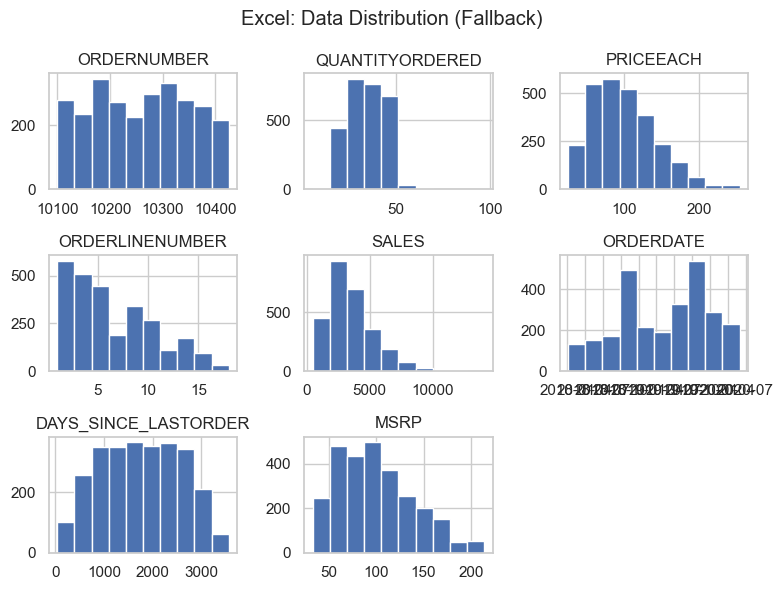

In [72]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
if 'Product' in excel_data.columns and 'Total_Revenue' in excel_data.columns:
    sns.barplot(x='Product', y='Total_Revenue', data=excel_data, estimator=sum, ci=None, palette="plasma")
    plt.title("Excel: Total Sales by Product", fontsize=14)
    plt.xlabel("Product")
    plt.ylabel("Total Revenue")
    plt.grid(True, linestyle="--", alpha=0.6)
else:
    excel_data.hist(figsize=(8,6))
    plt.suptitle("Excel: Data Distribution (Fallback)")
plt.tight_layout()
plt.show()


In [58]:
# =======================================================
# 3. JSON File Workflow
# =======================================================
print("\n================ JSON DATA WORKFLOW ================\n")


================ JSON DATA WORKFLOW ================



In [59]:
# Load Data
json_data = pd.read_json("C:/Users/SAKSHI/Downloads/CL 1/Auto Sales data.json")
print("JSON Data Loaded:\n", json_data.head())

JSON Data Loaded:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  02/24/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  05/07/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  07/01/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  08/25/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  10/28/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1 

In [60]:
# Explore
print("\n--- JSON Info ---")
print(json_data.info())
print("\n--- JSON Description ---")
print(json_data.describe(include='all'))


--- JSON Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  PO

In [61]:
# Check Missing Values
print("\nMissing values:\n", json_data.isnull().sum())


Missing values:
 ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [62]:
# Clean
json_data = json_data.drop_duplicates()
json_data = json_data.fillna(json_data.mean(numeric_only=True)) # replace numeric missing with mean
print("\nCleaned JSON Data Sample:\n", json_data.head())


Cleaned JSON Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  02/24/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  05/07/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  07/01/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  08/25/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  10/28/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDR

In [64]:
# Transform
if 'Date' in json_data.columns:
    json_data['Date'] = pd.to_datetime(json_data['Date'], errors='coerce')
    json_data['Year'] = json_data['Date'].dt.year
    json_data['Month'] = json_data['Date'].dt.month
if 'Price' in json_data.columns and 'Quantity' in json_data.columns:
    json_data['Total_Revenue'] = json_data['Price'] * json_data['Quantity']

In [73]:
#analyze
print("\nJSON Descriptive Stats:\n", json_data.describe())

if 'Product' in json_data.columns and 'Total_Revenue' in json_data.columns:
    sales_by_product = json_data.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
    print("\nTotal Sales by Product:\n", sales_by_product)

if 'Year' in json_data.columns:
    yearly_sales = json_data.groupby('Year')['Total_Revenue'].sum()
    print("\nYearly Sales:\n", yearly_sales)



JSON Descriptive Stats:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
std       91.877521         9.762135    42.042549         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000           2747.000000  2747.000000  
mean    3553.047583           1757.085912   100.691664  
std     1838.953901            819.280576    40.114802  
min      482.130000             42.000000    33.000000  
25%     2204.350000           1077.000000    68.000000  
5

<Figure size 800x600 with 0 Axes>

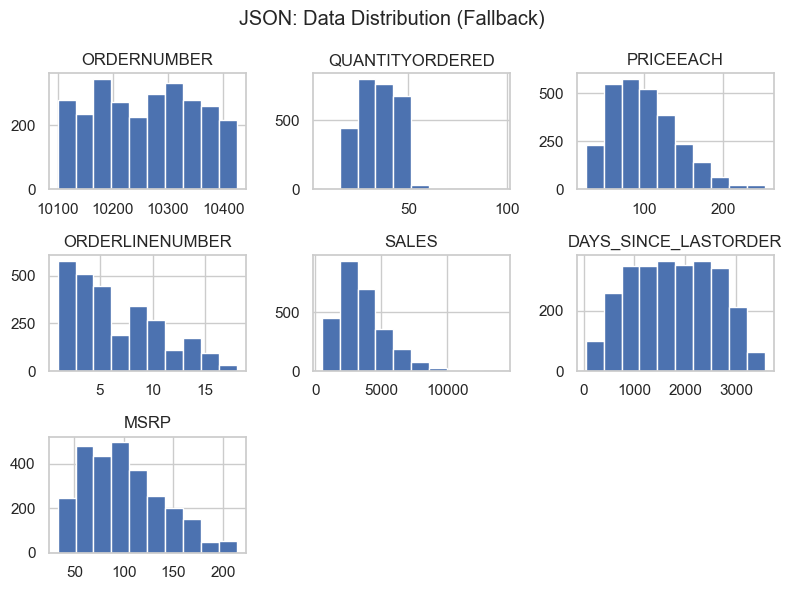

In [70]:
# Visualize
plt.figure(figsize=(8,6))
if 'Product' in json_data.columns and 'Total_Revenue' in json_data.columns:
    sns.barplot(x='Product', y='Total_Revenue', data=json_data, estimator=sum, ci=None, palette="cool")
    plt.title("JSON: Total Sales by Product", fontsize=14)
    plt.xlabel("Product")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.6)
else:
    json_data.hist(figsize=(8,6))
    plt.suptitle("JSON: Data Distribution (Fallback)")
plt.tight_layout()
plt.show()